## Final Project Submission

Please fill out:
* Student name: Jim Petoskey
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Ideas for project
* How much should Redfin pay for a given house? And, are there houses Redfin shouldn't buy?  If so, which ones?
    * buy houses with predictable value at 5% below predicted sale value.
        * Predictability of sale value determined by low R squared value.
    * how many houses did sell for a predicted value based on our model?
        * e.g. we use data from 2009-2013 to make model and test it on sales in the 2014-2018 range.

# Exploring Data

In [17]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

In [3]:
house_df = pd.read_csv('data/kc_house_data.csv')
#column_names = pd.read_csv('data/column_names.md')

## What's in kc_house_data?

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Baseline Model

## Use 3-4 predictors from numerical data in the King County Housing data set to create baseline model.

In [42]:
# set numerical data in new data frame
numericals = house_df[['bedrooms', 
                       'bathrooms', 
                       'sqft_living', 
                       'sqft_lot', 
                       'floors',
                       'sqft_above',
                       'yr_built',
                       'yr_renovated',
                       'zipcode', 
                       'sqft_living15', 
                       'sqft_lot15']]

# set target column
y = house_df['price']

numericals.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,1340,5650
1,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,1690,7639
2,2,1.00,770,10000,1.0,770,1933,NaN,98028,2720,8062
3,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,1360,5000
4,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,1800,7503


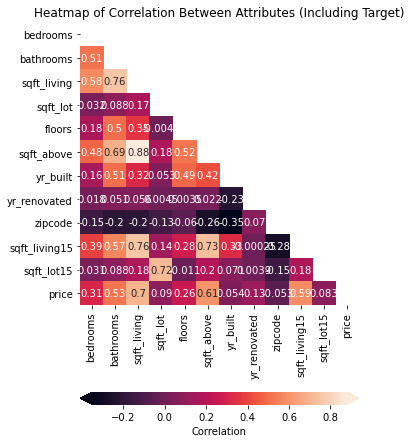

In [43]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([numericals, y], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

### Build a model with the top three numerical values, then I will examine and likely add-in categoricals after one-hot-encoding the non-numericals.

* The top three predictors are: sqft_living, (dropping sqft_above and sqft_living15 - see explanation below), bathrooms, and bedrooms.

* I will drop two of the three sqft_living, sqft_living15, and sqft_above because they  exhibit strong correlation to each other and likely strong multicollinearity.  Considering sqft_living has a stronger correlation to price, which is our target, I will drop sqft_living15 and sqft_above.

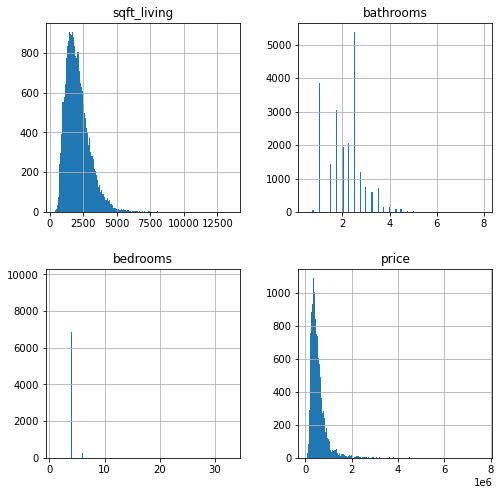

In [30]:
# Set top three numerical values
t3_numericals = house_df[['sqft_living', 'bathrooms', 'bedrooms', 'price']]

# Look at histograms for patterns
t3_numericals.hist(figsize = [8, 8], bins='auto');

### Remove outliers later - especially in the bedrooms and sqft_living categories.

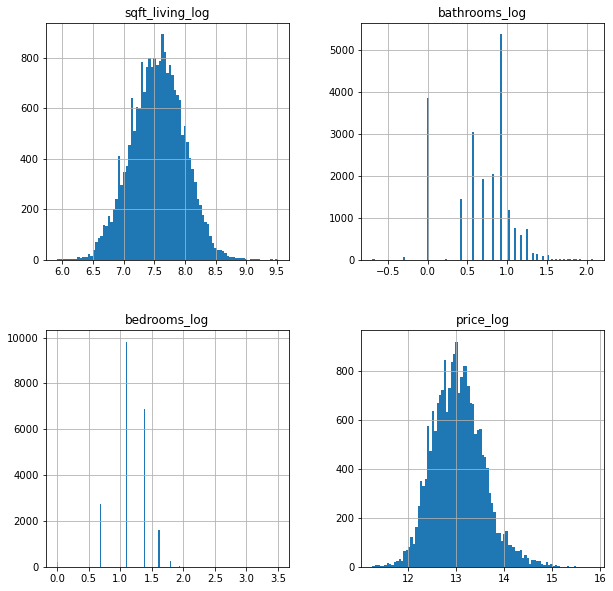

In [31]:
# Perform log transformations for t3_numericals 

log_names = [f'{column}_log' for column in t3_numericals.columns]

house_log = np.log(t3_numericals)
house_log.columns = log_names
house_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

### Skewness from outliers reduced with the log function performed.

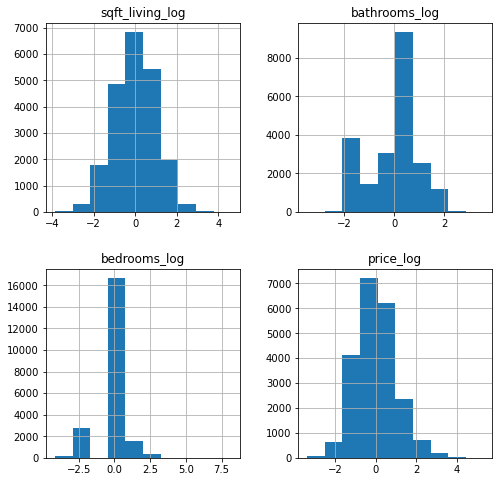

In [32]:
# Standardize the log features

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = house_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);

In [33]:
features_final.head()

,sqft_living_log,bathrooms_log,bedrooms_log,price_log
0,-1.125556,-1.726509,-0.279718,-1.401998
1,0.709446,0.339653,-0.279718,0.279938
2,-2.131893,-1.726509,-1.711611,-1.799430
3,0.070674,1.072635,0.736226,0.499698
4,-0.292725,0.039555,-0.279718,0.178434


In [41]:
# Model Summary
#sm.OLS(y, sm.add_constant(house_log_norm)).fit().summary()
X = features_final.drop(['price_log'], axis=1)
y = features_final['price_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     6414.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:36:13   Log-Likelihood:                -23764.
No. Observations:               21597   AIC:                         4.754e+04
Df Residuals:                   21593   BIC:                         4.757e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.343e-15      0.005   2.71e-13      1.000      -0.010       0.010
sqft_living_log     0.7572      0.008     89.141      0.000       0.741       0.774
bathrooms_log       0.0325      0.008      4.244      0.000       0.017       0.047
bedrooms_log       -0.1652      0.007    -25.342      0.000      -0.178      -0.152
==============================================================================
Omnibus:                      104.465   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.162
Skew:                           0.139   Prob(JB):                     2.93e-22
Kurtosis:                       2.820   Cond. No.                         3.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Baseline Model - moderate R-squared value, good p-values, condition number, and identical Adjusted R-squared value.

* The R-squared value is not very high, but hopefully it will increase after I modify some of the data and include categorical variables.  This seems like a solid baseline model to work from as the p-values for the predictors fall far below the threshold of 5%, the condition number is low, indicating low multicollinearity, the standard errors are all far lower than the values of the coefficients, and the adjusted R-squared value is identical to the R-squared value, indicating we have a very low bias.

* As I alter the model, likely increasing complexity in order to increase the predictive capacity of the model, the adjusted R-squared value will probably not maintain equality or near-equality with the R-squared value.